In [1]:

import pandas as pd
import csv
import os
import os.path
import pymorphy2
import regex as re
import main
import asyncio
from collections import Counter

Пункт 1

In [2]:
column_name = ['class_mark', 'text_review', 'count_words']
reviews_df = main.add_to_dataframe()
print(reviews_df)

     class_mark                                        text_review
0          good  Зеленая миля\n'Они помогли ему убить себя и та...
1          good  Зеленая миля\n'Боже, иногда Зеленая миля так д...
2          good  Зеленая миля\nОни помогли ему убить себя\n\n«О...
3          good  Зеленая миля\n«Когда призовет Господь на свой ...
4          good  Зеленая миля\nОбвиненный в страшном преступлен...
...         ...                                                ...
1995        bad  Сумерки\nФильм «ни о чем»! Не понимаю, что мно...
1996        bad  Сумерки\nСначала был Макс Шрек.\n\n\nПотом Бел...
1997        bad  Сумерки\nНа экраны вышла первая часть вампирск...
1998        bad  Сумерки\nСемнадцатилетняя Белла Свон переезжае...
1999        bad  Сумерки\nМоё отношение к данному фильму весьма...

[2000 rows x 2 columns]


Пункт 2 сделан сразу в пункте 1

Пункт 3

In [3]:
print('Столбец: <', column_name[0], '> пустой? -',
          main.check_nan(reviews_df, column_name[0]))
print('Столбец: <', column_name[1], '> пустой? -',
        main.check_nan(reviews_df, column_name[1]))


Столбец: < class_mark > пустой? - False
Столбец: < text_review > пустой? - False


Пункт 4

In [4]:
count_word = main.count_words_in_text(reviews_df, column_name[1])
reviews_df[column_name[2]] = pd.Series(count_word)
print(reviews_df)

     class_mark                                        text_review  \
0          good  Зеленая миля\n'Они помогли ему убить себя и та...   
1          good  Зеленая миля\n'Боже, иногда Зеленая миля так д...   
2          good  Зеленая миля\nОни помогли ему убить себя\n\n«О...   
3          good  Зеленая миля\n«Когда призовет Господь на свой ...   
4          good  Зеленая миля\nОбвиненный в страшном преступлен...   
...         ...                                                ...   
1995        bad  Сумерки\nФильм «ни о чем»! Не понимаю, что мно...   
1996        bad  Сумерки\nСначала был Макс Шрек.\n\n\nПотом Бел...   
1997        bad  Сумерки\nНа экраны вышла первая часть вампирск...   
1998        bad  Сумерки\nСемнадцатилетняя Белла Свон переезжае...   
1999        bad  Сумерки\nМоё отношение к данному фильму весьма...   

      count_words  
0             117  
1            1448  
2             639  
3             751  
4             361  
...           ...  
1995          176  

Пункт 5

In [5]:
stat = main.statistical_information(reviews_df, column_name[2])
print(stat)

count    2000.000000
mean      378.286500
std       221.887488
min        13.000000
25%       215.000000
50%       324.000000
75%       486.500000
max      2427.000000
Name: count_words, dtype: float64


Пункт 6

In [6]:
filtered_reviews_df = main.filtered_dataframe_word(
        reviews_df, column_name[2], 1000)
print(filtered_reviews_df)

     class_mark                                        text_review  \
1          good  Зеленая миля\n'Боже, иногда Зеленая миля так д...   
266        good  Список Шиндлера\nВсе мы ЛЮДИ, прекрасно понима...   
295        good  Список Шиндлера\n1993 год стал одним из самых ...   
400        good  Матрица\nИщите в фильме смысл. Вы его увидите....   
401        good  Матрица\nИщите в фильме смысл. Вы его увидите....   
431        good  Матрица\nИщите в фильме смысл. Вы его увидите....   
674        good  Побег из Шоушенка\nЗанимайся жизнью или занима...   
676        good  Побег из Шоушенка\nЗанимайся жизнью или занима...   
733        good  Побег из Шоушенка\nЗанимайся жизнью или занима...   
1068        bad  Тайна Коко\nВеселая сказка или мрачная антиуто...   
1083        bad  Бойцовский клуб\nГлоток настоящегоЛовким пролё...   
1468        bad  Джанго освобожденный\n(Рецензия содержит спойл...   
1527        bad  Джанго освобожденный\nИтак, вслед за почти все...   
1578        bad  Зел

Пункт 7

In [7]:
reviews_good_df = main.filtered_dataframe_class(
        reviews_df, column_name[0], 'good')

    
print(reviews_good_df)

    class_mark                                        text_review  count_words
0         good  Зеленая миля\n'Они помогли ему убить себя и та...          117
1         good  Зеленая миля\n'Боже, иногда Зеленая миля так д...         1448
2         good  Зеленая миля\nОни помогли ему убить себя\n\n«О...          639
3         good  Зеленая миля\n«Когда призовет Господь на свой ...          751
4         good  Зеленая миля\nОбвиненный в страшном преступлен...          361
..         ...                                                ...          ...
995       good  1+1\nЯ, честно, до появления этого фильма в то...          331
996       good  1+1\nДрузья давно советовали мне посмотреть эт...          448
997       good  1+1\nВсегда, когда смотришь хороший европейски...          198
998       good  1+1\nПосмотрел этот фильм сравнительно недавно...          278
999       good  Тайна Коко\nЭто надо видеть!!!Наверное, это бу...          394

[1000 rows x 3 columns]


Пункт 8

In [8]:
stat_good = main.statistical_information(reviews_good_df, column_name[2])
print('\nДля положительных отзывов:\n')
print('Минимальное кол-во слов:', stat_good['min'])
print('Максимальное кол-во слов:', stat_good['max'])
print('Среднее кол-во слов:', stat_good['mean'])

reviews_bad_df = main.filtered_dataframe_class(reviews_df, column_name[0], 'bad')

stat_bad = main.statistical_information(reviews_bad_df, column_name[2])
print('\nДля отрицательных отзывов:\n')
print('Минимальное кол-во слов:', stat_bad['min'])
print('Максимальное кол-во слов:', stat_bad['max'])
print('Среднее кол-во слов:', stat_bad['mean'])


Для положительных отзывов:

Минимальное кол-во слов: 13.0
Максимальное кол-во слов: 2427.0
Среднее кол-во слов: 370.85

Для отрицательных отзывов:

Минимальное кол-во слов: 49.0
Максимальное кол-во слов: 1015.0
Среднее кол-во слов: 385.723


Функция для лемматизации слов

In [22]:

async def asynxron(reviews_df, column_name, output_lemma_1, output_lemma_2, loop):

    task1 = loop.create_task(
        main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 81, 82, output_lemma_1))
    task2 = loop.create_task(
        main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 660, 661, output_lemma_2))
    await asyncio.wait([task1, task2])

output_lemma_1 =[]
output_lemma_2 =[]
try:
    loop = asyncio.get_event_loop()
    loop.run_until_complete(asynxron(reviews_df, column_name, output_lemma_1, output_lemma_2, loop))
except:
    pass
output_lemma = output_lemma_1 + output_lemma_2
print(output_lemma)

[]


C:\Users\nika\AppData\Local\Temp\ipykernel_13220\407177070.py:18: RuntimeWarning: coroutine 'asynxron' was never awaited
  pass


In [5]:
output_lemma =[]
output_lemma = main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 660, 661)
output_lemma += main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 81, 82)
output_lemma += main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 295, 296)
output_lemma += main.lemmatizer_list(
            reviews_df, column_name[1],  'good', 431, 432)
output_lemma.sort()

print(len(output_lemma))

1383


In [38]:
word_dict = Counter(output_lemma)
word_dict = dict(word_dict)
word_dict_upd = {}
#print(word_dict_upd)
for key, value in word_dict.items():    
    if value > 5:
        word_dict_upd[key] = value

print(word_dict_upd)



{'время': 7, 'герой': 14, 'главный': 7, 'год': 8, 'каждый': 9, 'картина': 10, 'который': 22, 'матрица': 8, 'мир': 9, 'немалый': 7, 'нео': 8, 'один': 10, 'первый': 7, 'роль': 7, 'свой': 16, 'спилберг': 10, 'фильм': 14, 'характер': 6, 'человек': 12, 'шиндлера': 19}


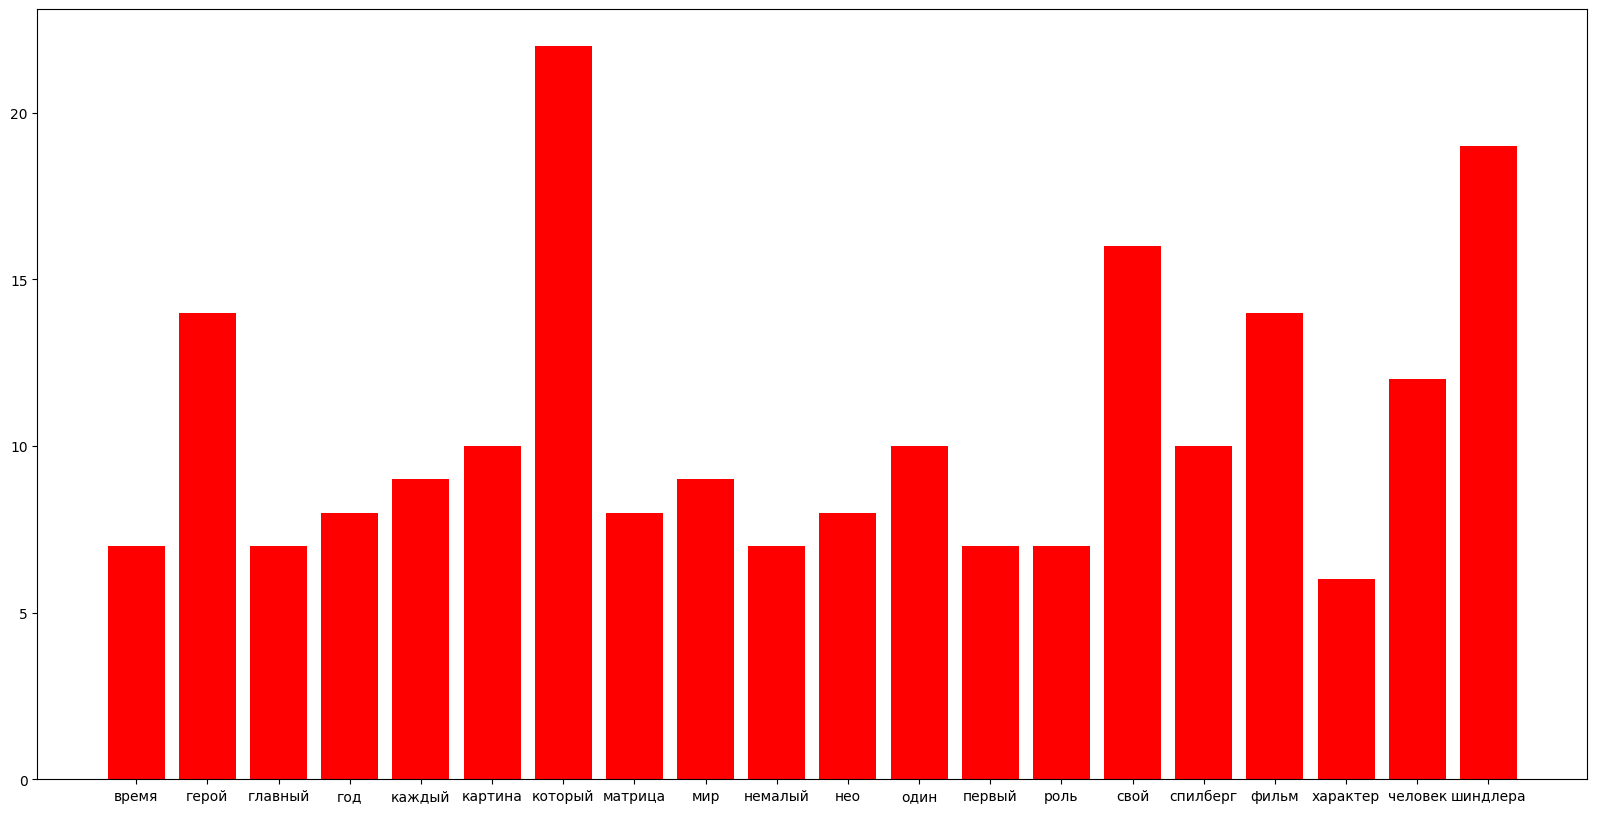

In [57]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

ax.bar(list(word_dict_upd.keys()), word_dict_upd.values(), color='r')

plt.show()